<a href="https://colab.research.google.com/github/deva-kumari/devakumari_cse22237/blob/main/lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

One Attribute Regression Metrics:
MSE: 4.610929314696545, RMSE: 2.1473074569554647, MAPE: 136485508102595.5, R²: 0.005468377101735089
Test Data Metrics: MSE: 4.378146727012577, RMSE: 2.0924021427566397, MAPE: 218043386835822.3, R²: -0.016835385423724425

All Attributes Regression Metrics:
MSE: 0.3897025104959671, RMSE: 0.624261572176253, MAPE: 3560931338876.2773, R²: 0.915945041929885
Test Data Metrics: MSE: 180.378379378155, RMSE: 13.430501828977016, MAPE: 1590323353544185.0, R²: -40.89332390014395

K-means Clustering Metrics:
Cluster Centers: [[-0.98113908  0.13349038  0.61298697 ...  0.17290913 -0.07072349
  -0.18774843]
 [-1.01720681  0.46412571  0.85151432 ... -0.11055031 -0.13169911
   0.42645133]]
Silhouette Score: 0.15077585474848082
Calinski-Harabasz Score: 101.66137949209643
Davies-Bouldin Index: 2.9476770261169154


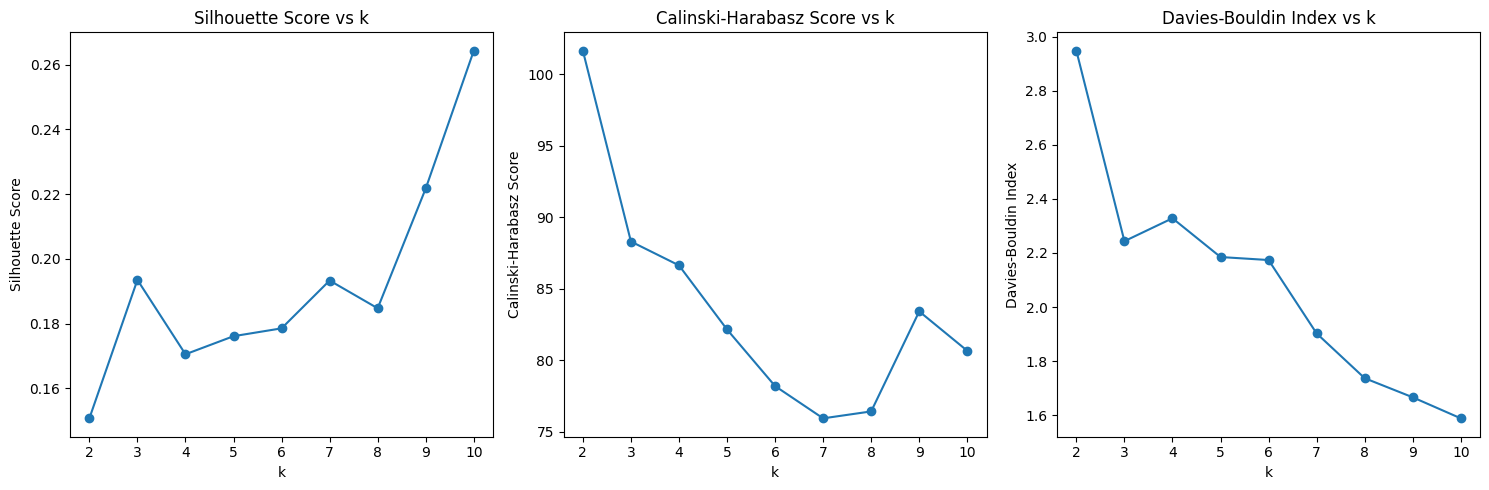

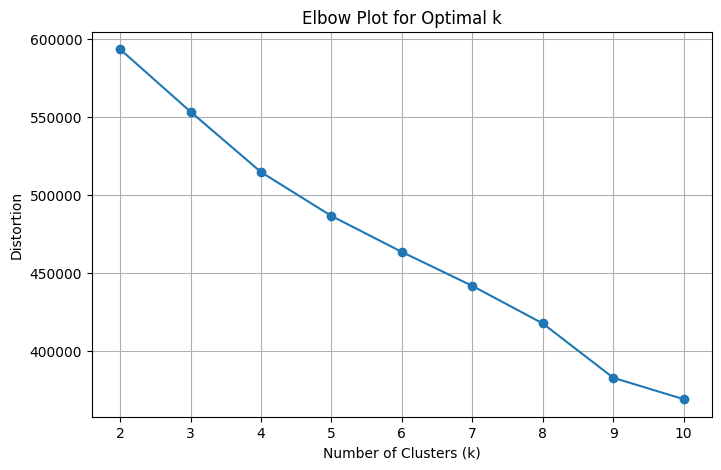

In [9]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('/mnt/cc_embed_data (2).csv')

# Splitting the data into features (X) and target (y)
X = df.iloc[:, :-1]  # All cc_embedding features
y = df['Final_Marks']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to perform linear regression and return metrics
def perform_linear_regression(X_train, X_test, y_train, y_test, use_all_attributes=True):
    if use_all_attributes:
        X_train_subset = X_train
        X_test_subset = X_test
    else:
        X_train_subset = X_train.iloc[:, [0]]
        X_test_subset = X_test.iloc[:, [0]]

    # Train the model
    reg = LinearRegression().fit(X_train_subset, y_train)

    # Predictions
    y_train_pred = reg.predict(X_train_subset)
    y_test_pred = reg.predict(X_test_subset)

    # Metrics
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)

    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)

    return {
        "regressor": reg,
        "mse_train": mse_train, "rmse_train": rmse_train, "mape_train": mape_train, "r2_train": r2_train,
        "mse_test": mse_test, "rmse_test": rmse_test, "mape_test": mape_test, "r2_test": r2_test
    }

# Function to perform K-means clustering and return metrics
def perform_kmeans_clustering(X_train, n_clusters=2):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42).fit(X_train)
    labels = kmeans.labels_
    cluster_centers = kmeans.cluster_centers_

    silhouette = silhouette_score(X_train, labels)
    calinski_harabasz = calinski_harabasz_score(X_train, labels)
    davies_bouldin = davies_bouldin_score(X_train, labels)

    return {
        "cluster_centers": cluster_centers,
        "silhouette_score": silhouette,
        "calinski_harabasz_score": calinski_harabasz,
        "davies_bouldin_index": davies_bouldin
    }

# Function to evaluate K-means for different values of k and plot metrics
def evaluate_kmeans(X_train):
    k_values = range(2, 11)
    silhouette_scores = []
    calinski_harabasz_scores = []
    davies_bouldin_scores = []
    distortions = []

    for k in k_values:
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=42).fit(X_train)
        labels = kmeans.labels_
        silhouette_scores.append(silhouette_score(X_train, labels))
        calinski_harabasz_scores.append(calinski_harabasz_score(X_train, labels))
        davies_bouldin_scores.append(davies_bouldin_score(X_train, labels))
        distortions.append(kmeans.inertia_)

    return k_values, silhouette_scores, calinski_harabasz_scores, davies_bouldin_scores, distortions

# Main execution
metrics_one_attr = perform_linear_regression(X_train, X_test, y_train, y_test, use_all_attributes=False)
metrics_all_attr = perform_linear_regression(X_train, X_test, y_train, y_test, use_all_attributes=True)
kmeans_metrics = perform_kmeans_clustering(X_train)
k_values, silhouette_scores, calinski_harabasz_scores, davies_bouldin_scores, distortions = evaluate_kmeans(X_train)

# Print results
print("One Attribute Regression Metrics:")
print(f"MSE: {metrics_one_attr['mse_train']}, RMSE: {metrics_one_attr['rmse_train']}, MAPE: {metrics_one_attr['mape_train']}, R²: {metrics_one_attr['r2_train']}")
print(f"Test Data Metrics: MSE: {metrics_one_attr['mse_test']}, RMSE: {metrics_one_attr['rmse_test']}, MAPE: {metrics_one_attr['mape_test']}, R²: {metrics_one_attr['r2_test']}")

print("\nAll Attributes Regression Metrics:")
print(f"MSE: {metrics_all_attr['mse_train']}, RMSE: {metrics_all_attr['rmse_train']}, MAPE: {metrics_all_attr['mape_train']}, R²: {metrics_all_attr['r2_train']}")
print(f"Test Data Metrics: MSE: {metrics_all_attr['mse_test']}, RMSE: {metrics_all_attr['rmse_test']}, MAPE: {metrics_all_attr['mape_test']}, R²: {metrics_all_attr['r2_test']}")

print("\nK-means Clustering Metrics:")
print(f"Cluster Centers: {kmeans_metrics['cluster_centers']}")
print(f"Silhouette Score: {kmeans_metrics['silhouette_score']}")
print(f"Calinski-Harabasz Score: {kmeans_metrics['calinski_harabasz_score']}")
print(f"Davies-Bouldin Index: {kmeans_metrics['davies_bouldin_index']}")

# Plot evaluation metrics
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score vs k')
plt.xlabel('k')
plt.ylabel('Silhouette Score')

plt.subplot(1, 3, 2)
plt.plot(k_values, calinski_harabasz_scores, marker='o')
plt.title('Calinski-Harabasz Score vs k')
plt.xlabel('k')
plt.ylabel('Calinski-Harabasz Score')

plt.subplot(1, 3, 3)
plt.plot(k_values, davies_bouldin_scores, marker='o')
plt.title('Davies-Bouldin Index vs k')
plt.xlabel('k')
plt.ylabel('Davies-Bouldin Index')

plt.tight_layout()
plt.show()

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, distortions, marker='o')
plt.title('Elbow Plot for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.grid(True)
plt.show()
